# Inception_V4 10000번 학습 사진데이터 2천장

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


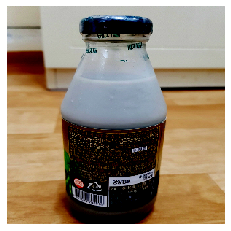

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['glass : 0.951056242', 'plastic : 0.0488278866', 'can : 0.000115861636']


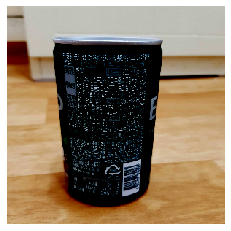

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['glass : 0.145289719', 'plastic : 0.0482117161', 'can : 0.806498587']


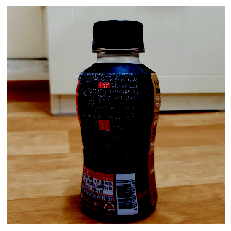

['glass : 0.159050599', 'plastic : 0.838504076', 'can : 0.0024452759']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


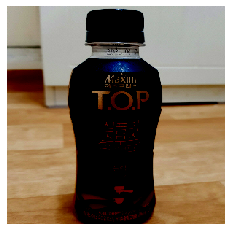

['glass : 0.0536834', 'plastic : 0.943745434', 'can : 0.00257114973']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


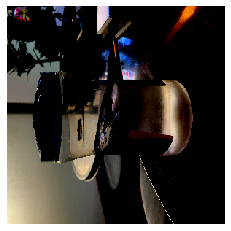

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['glass : 0.000303342415', 'plastic : 0.777542233', 'can : 0.222154349']


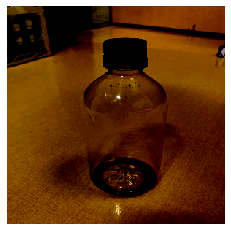

['glass : 0.0442848541', 'plastic : 0.955452919', 'can : 0.000262170215']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


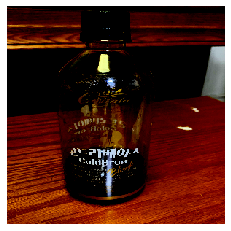

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['glass : 0.133232206', 'plastic : 0.865502954', 'can : 0.00126479112']


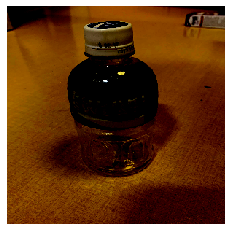

['glass : 0.156859025', 'plastic : 0.842960536', 'can : 0.0001805051']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


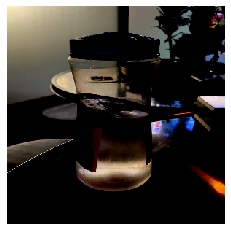

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['glass : 0.0117936367', 'plastic : 0.930259764', 'can : 0.0579466633']


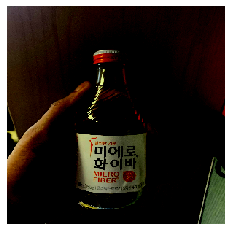

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['glass : 0.325089693', 'plastic : 0.674440801', 'can : 0.000469508028']


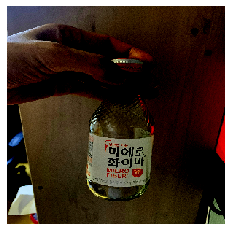

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['glass : 0.00351341534', 'plastic : 0.996470213', 'can : 1.63782897e-05']


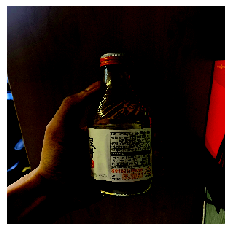

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['glass : 0.0122437049', 'plastic : 0.987644851', 'can : 0.000111461268']


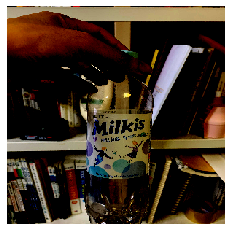

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['glass : 0.016975956', 'plastic : 0.185193211', 'can : 0.79783082']


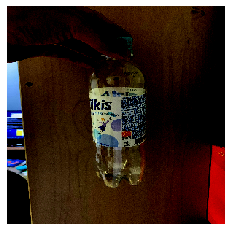

['glass : 0.00319752353', 'plastic : 0.996527851', 'can : 0.000274666701']


In [2]:
from matplotlib import pyplot as plt
from PIL import Image
import tensorflow as tf
from preprocessing import inception_preprocessing
import numpy as np
import base64
import json
import requests 

url = 'http://192.168.2.100:8501/v1/models/inceptionV4:predict'
return_image = []
return_predict = []
label = ['glass', 'plastic', 'can']

for i in range(1,15,1):
    filename = str(i) + ".jpg"
    image_s= open(filename, "rb").read()
    
    encoded_input_string = base64.b64encode(image_s)
    input_string = encoded_input_string.decode("utf-8")

    instance = [{"images" : {"b64": input_string}}]
    data = json.dumps({"signature_name": "predict_images", "instances": instance})
    json_response = requests.post(url, data=data)
    result = json_response.json()['predictions']
    
    return_image.append(result[0]['images'])
    return_predict.append(result[0]['scores'])

for i in range(14):
    plt.figure()
    plt.imshow(return_image[i])
    plt.axis('off')
    plt.show()
    c = [x + " : " + str(y) for x, y in zip(label, return_predict[i])]
    print(c)


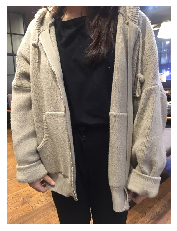

['banpal t : 2.44604471e-05', 'cardigan : 0.998841822', 'denim pants : 0.00045989349', 'hood t : 0.000673972943']


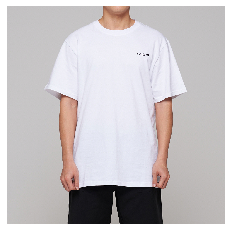

['banpal t : 0.999822676', 'cardigan : 9.85567312e-05', 'denim pants : 7.31968685e-05', 'hood t : 5.60037461e-06']


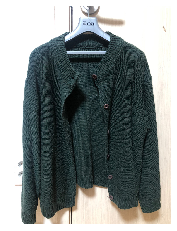

['banpal t : 0.000120399178', 'cardigan : 0.997603834', 'denim pants : 0.000199714821', 'hood t : 0.00207611942']


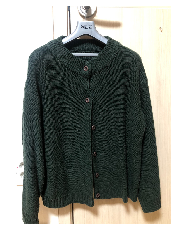

['banpal t : 1.94831482e-05', 'cardigan : 0.999718726', 'denim pants : 3.59799487e-05', 'hood t : 0.000225802214']


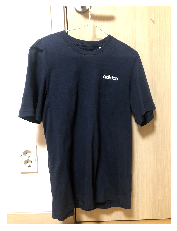

['banpal t : 0.996007', 'cardigan : 0.0016222999', 'denim pants : 1.61272346e-05', 'hood t : 0.00235462049']


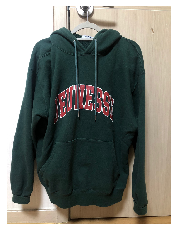

['banpal t : 6.04881916e-06', 'cardigan : 1.42013516e-06', 'denim pants : 3.63424238e-06', 'hood t : 0.999988914']


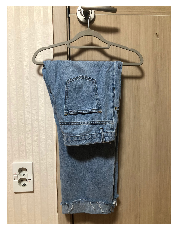

['banpal t : 0.552443683', 'cardigan : 0.0398673154', 'denim pants : 0.211515576', 'hood t : 0.196173415']


'\n    return_image.append(result[0][\'images\'])\n   \n\n        c = [x + " : " + str(y) for x, y in zip(label, return_predict[i])]\n    print(c)\n'

In [84]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import json
import requests 
import base64
url = 'http://localhost:8501/v1/models/inceptionV4:predict'
return_image = []
return_predict = []
label = ['banpal t', 'cardigan', 'denim pants', 'hood t']

for i in range(1, 8, 1):
    filename = str(i) + ".jpg"
    image_s= open(filename, "rb").read()
    encoded_input_string = base64.b64encode(image_s)
    input_string = encoded_input_string.decode("utf-8")

    instance = [{"images" : {"b64": input_string}}]
    data = json.dumps({"signature_name": "predict_images", "instances": instance})
    json_response = requests.post(url, data=data)
    result = json_response.json()['predictions'][0]
    
    c = [x + " : " + str(y) for x,y in zip(label, result)]
    
    plt.figure()
    plt.imshow(imread(filename))
    plt.axis('off')
    plt.show()
    print(c)


<class 'numpy.ndarray'>


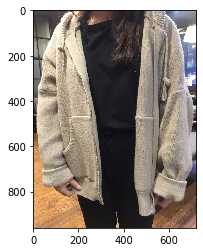

In [63]:
img = imread("1.jpg")
print(type(img))
plt.imshow(img)

[[0.255262822, 0.0807366073, 0.0646166205, 0.599383891]]


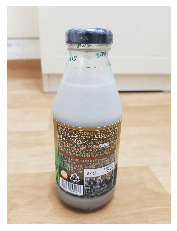

In [14]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import json
import requests 
import base64
url = 'http://192.168.2.104:8501/v1/models/inceptionV3:predict'
return_image = []
return_predict = []
#label = ['banpal t', 'cardigan', 'denim pants', 'hood t']

filename = "1.jpg"
image_s= open(filename, "rb").read()
encoded_input_string = base64.b64encode(image_s)
input_string = encoded_input_string.decode("utf-8")

instance = [{"images" : {"b64": input_string}}]
data = json.dumps({"signature_name": "predict_images", "instances": instance})
json_response = requests.post(url, data=data)

result = json_response.json()['predictions']

print(result)
plt.figure()
plt.imshow(imread(filename))
plt.axis('off')
plt.show()

Tensor("kkk_12:0", shape=(), dtype=int32)
